## EDA on Data

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('./data/data.csv')

# View the first few rows
print(df.head())

     Birthdate   Education  Postalcode     Location  UserId  \
0  1993.12.09.   gimnázium      8800.0  Nagykanizsa    1973   
1  1993.12.09.   gimnázium      8800.0  Nagykanizsa    1973   
2  1998.05.19.  szakiskola      2315.0  Szigethalom    1552   
3  1998.05.19.  szakiskola      2315.0  Szigethalom    1552   
4  1998.05.19.  szakiskola      2315.0  Szigethalom    1552   

   CourseModuleState  CourseModuleCompletion  CourseCompletionStart  \
0                  1              1731091748                      0   
1                  1              1731091828                      0   
2                  1              1728067276                      0   
3                  0                       0                      0   
4                  1              1731075573             1732617610   

   CourseCompletionFinish  ModuleName  CourseModuleId  Courseid  ModuleGrade  \
0                     NaN  customcert             476        48          NaN   
1                     NaN       sc

In [2]:
print(df.dtypes)
print(df['Education'].unique())  # Example for a categorical column

Birthdate                  object
Education                  object
Postalcode                float64
Location                   object
UserId                      int64
CourseModuleState           int64
CourseModuleCompletion      int64
CourseCompletionStart       int64
CourseCompletionFinish    float64
ModuleName                 object
CourseModuleId              int64
Courseid                    int64
ModuleGrade               float64
ModuleMaxgrade            float64
dtype: object
['gimnázium' 'szakiskola' 'egyetem' 'általános' 'technikum'
 'egyetemi szakképzés']


In [3]:
print(df.describe())

         Postalcode        UserId  CourseModuleState  CourseModuleCompletion  \
count  11827.000000  11827.000000       11827.000000            1.182700e+04   
mean    4838.655619    930.209098           1.104929            1.624084e+09   
std     2793.404985    576.134516           0.523002            3.999316e+08   
min     1013.000000     37.000000           0.000000            0.000000e+00   
25%     2422.000000    415.000000           1.000000            1.716821e+09   
50%     4220.000000    897.000000           1.000000            1.719396e+09   
75%     7300.000000   1391.000000           1.000000            1.727682e+09   
max     9919.000000   2115.000000           3.000000            1.733395e+09   

       CourseCompletionStart  CourseCompletionFinish  CourseModuleId  \
count           1.182700e+04            6.312000e+03    11827.000000   
mean            9.198765e+08            1.723603e+09      238.656633   
std             8.598883e+08            5.576612e+06      154.5

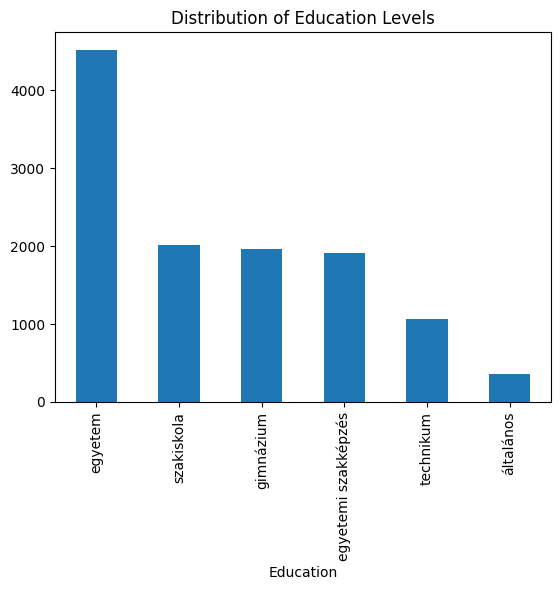

In [4]:
import matplotlib.pyplot as plt

# Education distribution
df['Education'].value_counts().plot(kind='bar')
plt.title('Distribution of Education Levels')
plt.show()

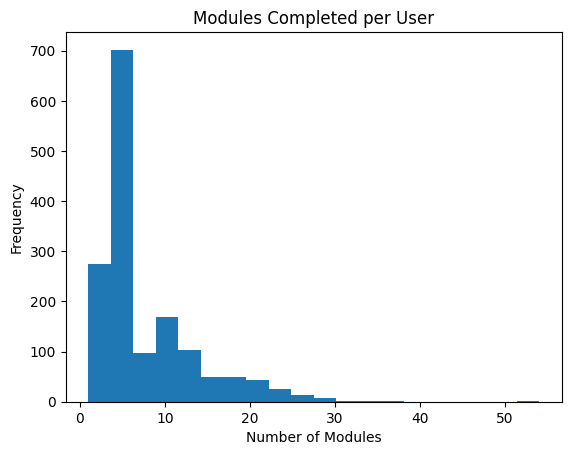

In [5]:
user_module_counts = df.groupby('UserId').size()
user_module_counts.plot(kind='hist', bins=20)
plt.title('Modules Completed per User')
plt.xlabel('Number of Modules')
plt.show()

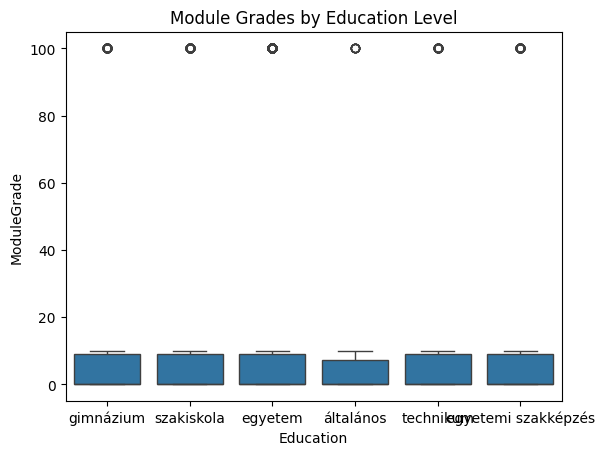

In [6]:
import seaborn as sns

sns.boxplot(x='Education', y='ModuleGrade', data=df)
plt.title('Module Grades by Education Level')
plt.show()

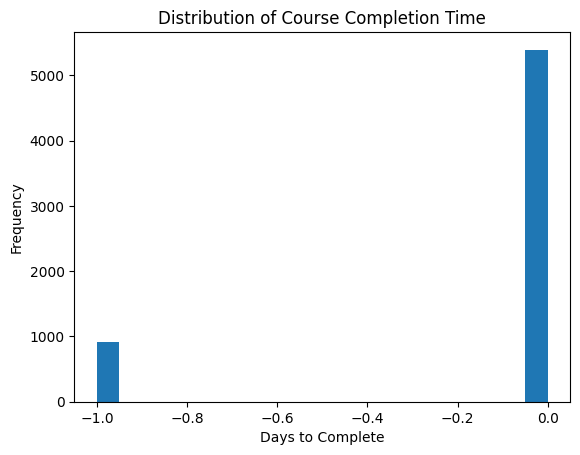

In [7]:
df['CompletionTime'] = pd.to_datetime(df['CourseCompletionFinish']) - pd.to_datetime(df['CourseModuleCompletion'])
df['CompletionTime'].dt.days.plot(kind='hist', bins=20)
plt.title('Distribution of Course Completion Time')
plt.xlabel('Days to Complete')
plt.show()

In [8]:
print(df[['ModuleGrade', 'ModuleMaxgrade']].corr())

                ModuleGrade  ModuleMaxgrade
ModuleGrade        1.000000        0.038292
ModuleMaxgrade     0.038292        1.000000


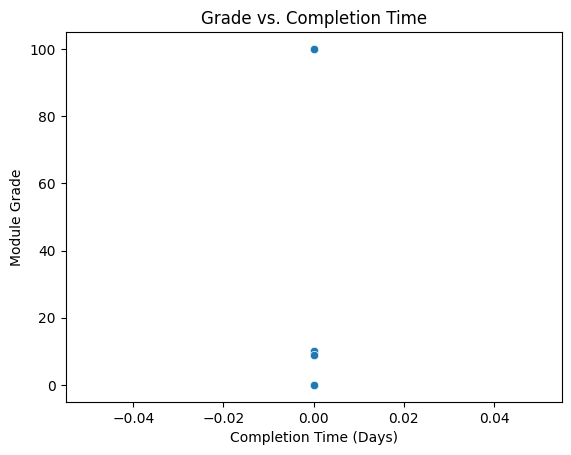

In [9]:
sns.scatterplot(x=df['CompletionTime'].dt.days, y='ModuleGrade', data=df)
plt.title('Grade vs. Completion Time')
plt.xlabel('Completion Time (Days)')
plt.ylabel('Module Grade')
plt.show()

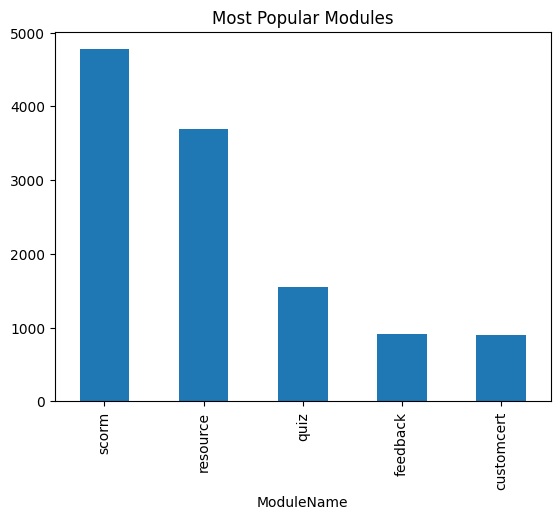

In [10]:
df['ModuleName'].value_counts().plot(kind='bar')
plt.title('Most Popular Modules')
plt.show()

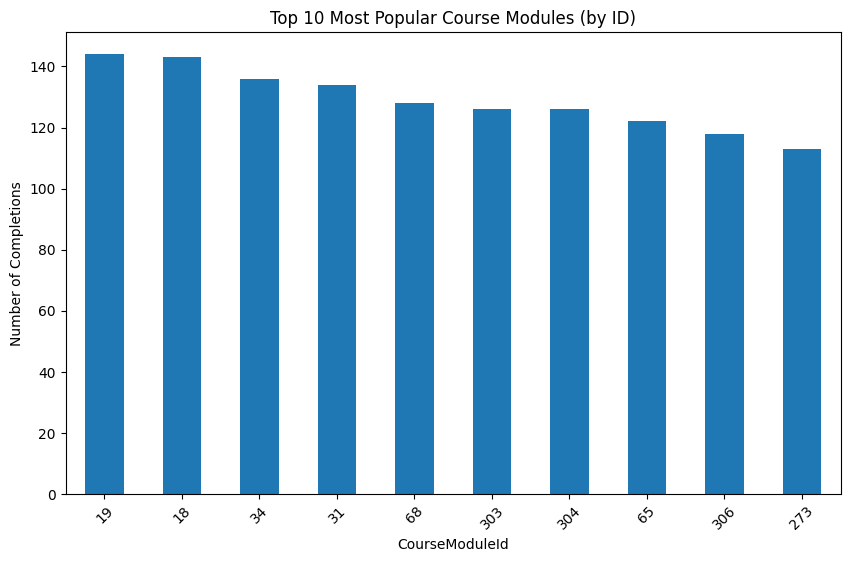

In [11]:
# Count completions per CourseModuleId
module_popularity = df['CourseModuleId'].value_counts()

# Plot the top 10 most popular CourseModuleId
module_popularity.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Most Popular Course Modules (by ID)')
plt.xlabel('CourseModuleId')
plt.ylabel('Number of Completions')
plt.xticks(rotation=45)
plt.show()

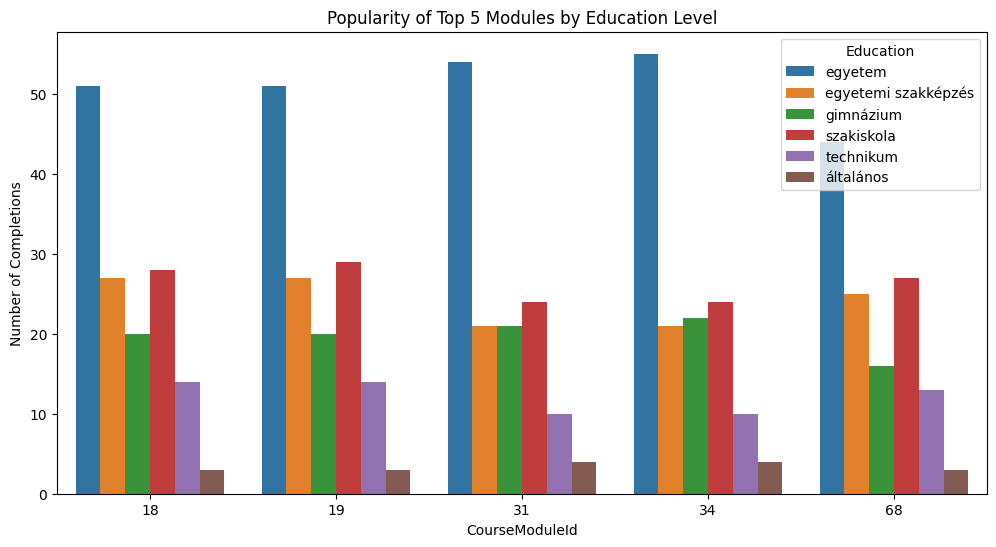

In [12]:
import seaborn as sns

# Group by CourseModuleId and Education to get completion counts
module_education_popularity = df.groupby(['CourseModuleId', 'Education']).size().reset_index(name='Count')

# Filter top 5 CourseModuleId
top_modules = module_popularity.head(5).index  # Select top 5 CourseModuleIds
filtered_data = module_education_popularity[module_education_popularity['CourseModuleId'].isin(top_modules)]

# Plot popularity of top modules across education levels
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='CourseModuleId', y='Count', hue='Education')
plt.title('Popularity of Top 5 Modules by Education Level')
plt.xlabel('CourseModuleId')
plt.ylabel('Number of Completions')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode categorical columns
categorical_columns = ['Education', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

# Select features and target
X = df[['Education', 'Location', 'ModuleGrade', 'ModuleMaxgrade']]
y = df['CourseModuleId']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Decision TreeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.013524936601859678
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        19
           4       0.04      0.08      0.05        12
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00        13
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         6
          12       0.02      0.04      0.03        27
          13       0.21      0.31      0.25        13
          18       0.00      0.00      0.00        26
          19       0.00      0.00      0.00        26
          25       0.00      0.00      0.00        13
          29       0.00      0.00      0.00        12
          30       0.00      0.00      0.00        19
          31       0.00      0.00      0.00        25
          32       0.00      0.00      0.00         9
          33       0.09      0.05      0.07        19
          34       0.03      0.04   

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [15]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.01944209636517329
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        19
           4       0.08      0.08      0.08        12
           6       0.00      0.00      0.00        11
           7       0.12      0.08      0.10        13
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         6
          12       0.11      0.11      0.11        27
          13       0.12      0.15      0.14        13
          18       0.00      0.00      0.00        26
          19       0.00      0.00      0.00        26
          25       0.00      0.00      0.00        13
          29       0.00      0.00      0.00        12
          30       0.00      0.00      0.00        19
          31       0.00      0.00      0.00        25
          32       0.00      0.00      0.00         9
          33       0.00      0.00      0.00        19
          34       0.03      0.04    

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

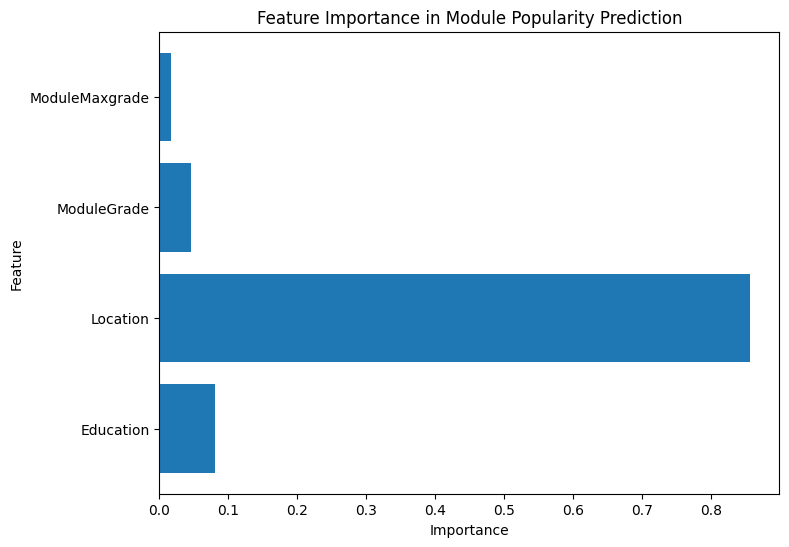

In [18]:
import matplotlib.pyplot as plt

# Feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances)
plt.title('Feature Importance in Module Popularity Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()